## 라이브러리 import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

#한글 폰트 깨짐 방지
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family
get_font_family()
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)

# seed 설정
np.random.seed(42)

## 데이터 불러오기

In [2]:
df = pd.read_csv("C:/Users/Gram14/원티드 프리온보딩/팀 프로젝트/2주차/모두컴퍼니_기술과제/실전db.csv", engine='python')
df.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


In [3]:
print(df.shape)

(879271, 8)


In [4]:
print(df.dtypes)

USER_ID        int64
JOIN_DATE     object
D_TYPE        object
STORE_ID       int64
GOODS_TYPE    object
DATE          object
COUNT          int64
AD1           object
dtype: object


In [5]:
# JOIN_DATE, DATE 를 날짜형 변수로 바꾸기
df['JOIN_DATE'] = pd.to_datetime(df['JOIN_DATE'])
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
print(df.dtypes)

USER_ID                int64
JOIN_DATE     datetime64[ns]
D_TYPE                object
STORE_ID               int64
GOODS_TYPE            object
DATE          datetime64[ns]
COUNT                  int64
AD1                   object
dtype: object


In [7]:
df.describe()

,USER_ID,STORE_ID,COUNT
count,8.792710e+05,879271.000000,879271.000000
mean,1.206566e+06,149599.960642,1.029079
std,4.206529e+05,68898.035318,0.512428
min,2.240000e+02,4.000000,1.000000
25%,9.005760e+05,92437.000000,1.000000
50%,1.321440e+06,173059.000000,1.000000
75%,1.542416e+06,220661.000000,1.000000
max,1.830598e+06,231465.000000,61.000000


## train/ test set 분리
- train set : 2020/01/01 ~ 2020/09/30
- test set : 2020/10/01 ~ 2020/12/31

In [8]:
df_train = df[df['DATE'] <= '2020-09-30']
df_test =  df[df['DATE'] > '2020-09-30']

# DATA EDA

In [28]:
df_train.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


## D_TYPE
- AA:당일권 , BB:월 정기권, CC:시간권 (추정) 

In [30]:
df_train['D_TYPE'].value_counts()

AA    350388
BB    271869
CC      1322
Name: D_TYPE, dtype: int64

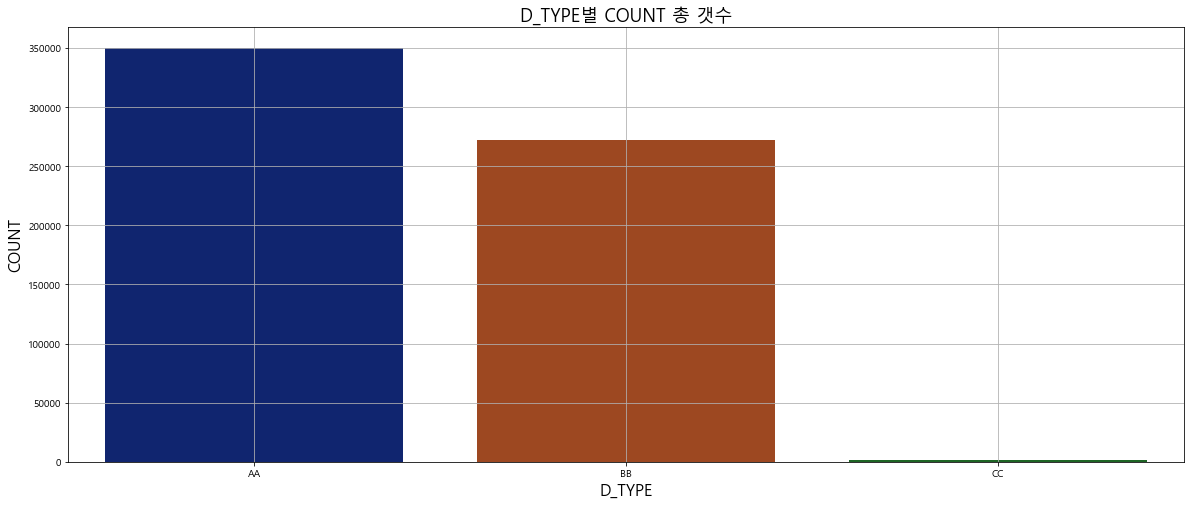

In [44]:
dtype_count = df_train['COUNT'].groupby(df_train['D_TYPE']).count()
plt.figure(figsize=(20,8))
sns.barplot(dtype_count.index, dtype_count.values, palette='dark')
plt.grid()
plt.title('D_TYPE별 COUNT 총 갯수', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('D_TYPE', fontsize=16)
plt.show()

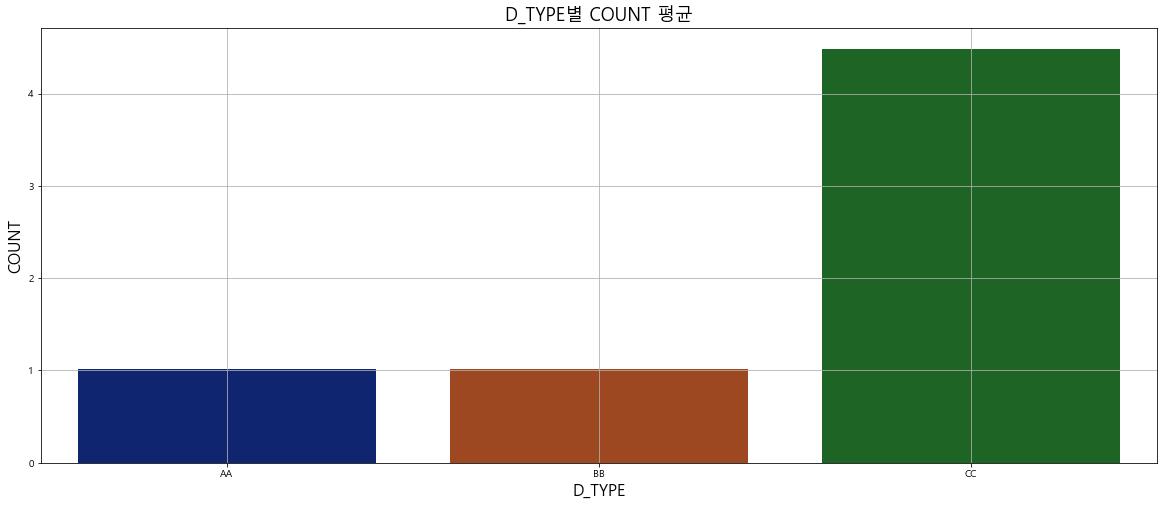

In [45]:
dtype_count = df_train['COUNT'].groupby(df_train['D_TYPE']).mean()
plt.figure(figsize=(20,8))
sns.barplot(dtype_count.index, dtype_count.values, palette='dark')
plt.grid()
plt.title('D_TYPE별 COUNT 평균', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('D_TYPE', fontsize=16)
plt.show()

In [95]:
dtype_count.head()

D_TYPE
AA    1.021074
BB    1.017832
CC    4.487141
Name: COUNT, dtype: float64

AA,BB 인경우가 대다수이지만 count=1이다. 반면, CC는 적지만, count의 수가 크다.

## 1.2 STORE_ID

In [55]:
storeid_count = df_train['COUNT'].groupby(df_train['STORE_ID']).count()
storeid_count.describe()

count      897.000000
mean       695.182832
std       1607.268210
min          1.000000
25%         10.000000
50%         77.000000
75%        625.000000
max      13285.000000
Name: COUNT, dtype: float64

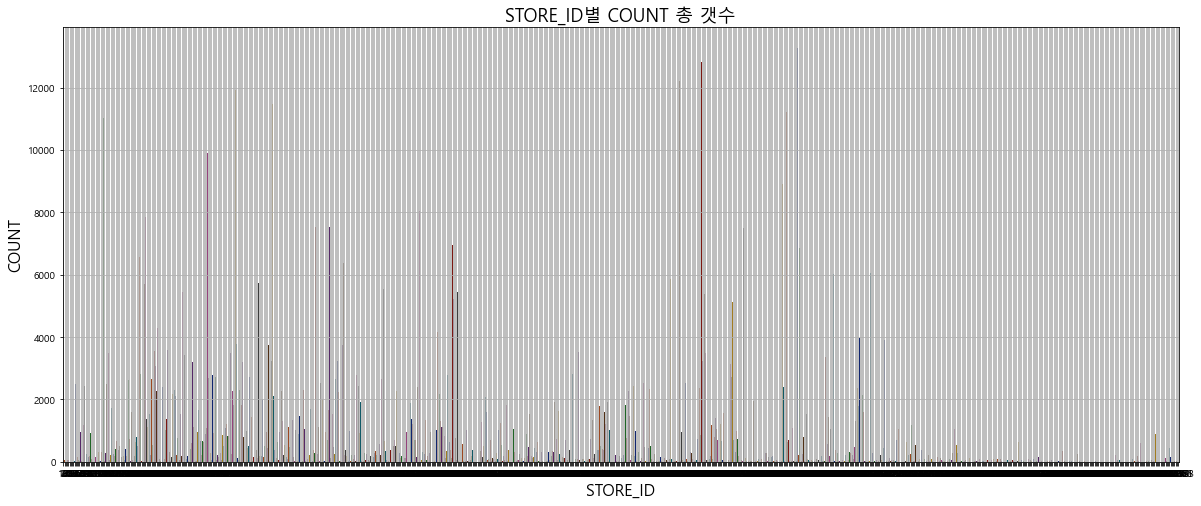

In [52]:
storeid_count = df_train['COUNT'].groupby(df_train['STORE_ID']).count()
plt.figure(figsize=(20,8))
sns.barplot(storeid_count.index, storeid_count.values, palette='dark')
plt.grid()
plt.title('STORE_ID별 COUNT 총 갯수', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('STORE_ID', fontsize=16)
plt.show()

## GOODS_TYPE

In [59]:
df_train['GOODS_TYPE'].value_counts()

A    426204
C     95588
B     87763
D     14024
Name: GOODS_TYPE, dtype: int64

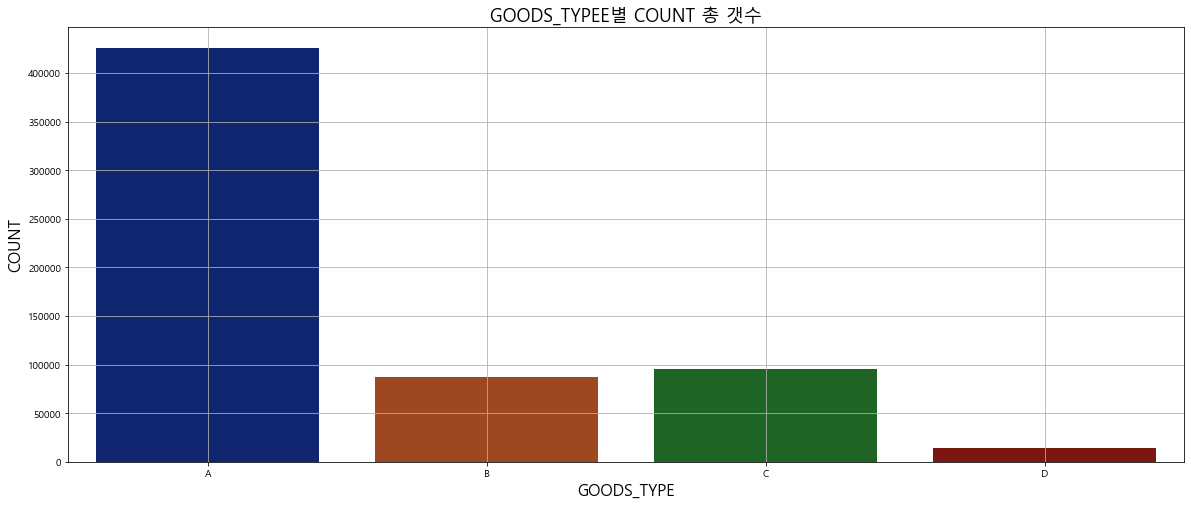

In [60]:
goodstype_count = df_train['COUNT'].groupby(df_train['GOODS_TYPE']).count()
plt.figure(figsize=(20,8))
sns.barplot(goodstype_count.index, goodstype_count.values, palette='dark')
plt.grid()
plt.title('GOODS_TYPEE별 COUNT 총 갯수', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('GOODS_TYPE', fontsize=16)
plt.show()

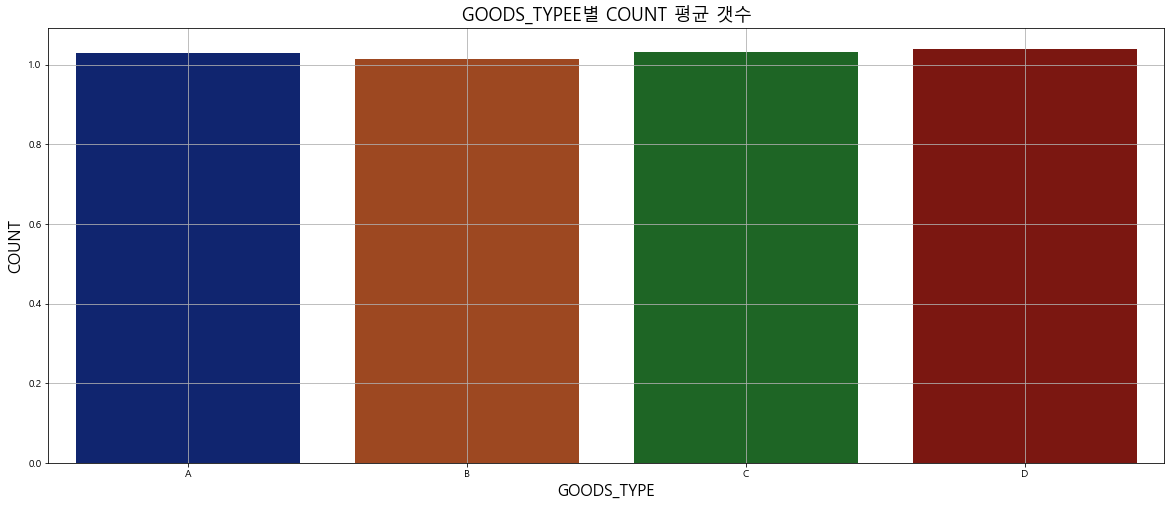

In [61]:
goodstype_count = df_train['COUNT'].groupby(df_train['GOODS_TYPE']).mean()
plt.figure(figsize=(20,8))
sns.barplot(goodstype_count.index, goodstype_count.values, palette='dark')
plt.grid()
plt.title('GOODS_TYPEE별 COUNT 평균 갯수', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('GOODS_TYPE', fontsize=16)
plt.show()

## AD1

In [64]:
df_train['AD1'].value_counts().describe()

count        78.000000
mean       7994.602564
std       23582.949413
min           1.000000
25%          29.250000
50%         217.500000
75%        2420.500000
max      126227.000000
Name: AD1, dtype: float64

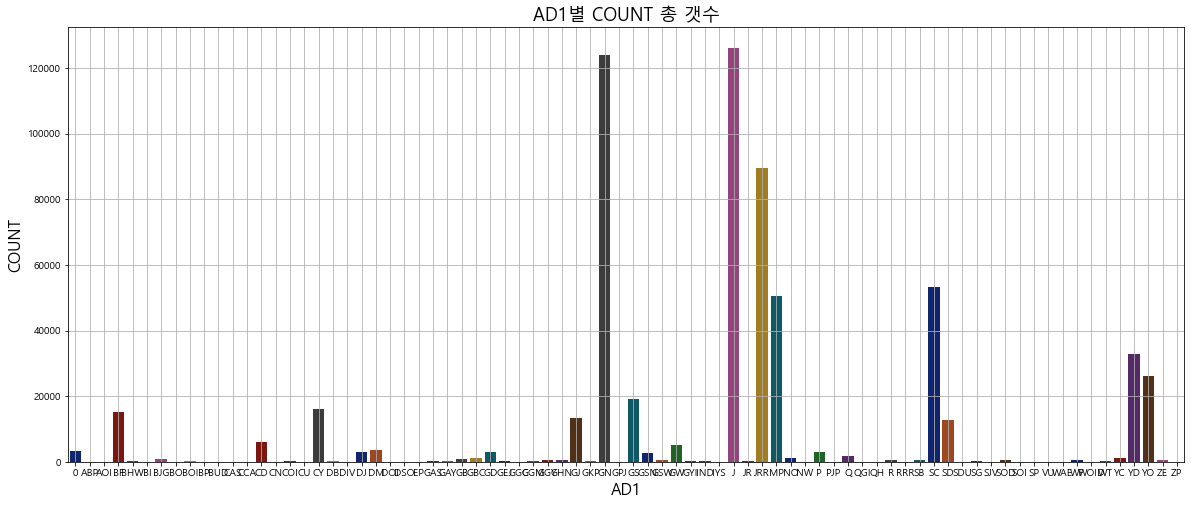

In [63]:
ad1_count = df_train['COUNT'].groupby(df_train['AD1']).count()
plt.figure(figsize=(20,8))
sns.barplot(ad1_count.index, ad1_count.values, palette='dark')
plt.grid()
plt.title('AD1별 COUNT 총 갯수', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('AD1', fontsize=16)
plt.show()

## COUNT

In [142]:
df_train['COUNT'].describe()

count    623579.000000
mean          1.027009
std           0.426268
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          49.000000
Name: COUNT, dtype: float64

75%까지 count값이 1일 정도로, 대부분 1의 값을 가지지만, 크게 다른 경우도 있는 것 같다.

In [151]:
# count가 높은 상위 100개
df_train.sort_values(by=['COUNT'],ascending=False).head(100)

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
505902,999665,2018-12-16,CC,2428,A,2020-08-15,49,CY
591734,999665,2018-12-16,CC,90542,A,2020-09-19,39,GN
371177,999665,2018-12-16,CC,2058,A,2020-06-27,39,GN
605474,999665,2018-12-16,CC,223666,A,2020-09-24,39,SJV
611928,999665,2018-12-16,CC,220959,A,2020-09-26,38,SC
608615,999665,2018-12-16,CC,83199,C,2020-09-25,37,GN
408479,999665,2018-12-16,CC,182175,A,2020-07-11,36,SC
486818,999665,2018-12-16,CC,82434,A,2020-08-08,35,J
464565,999665,2018-12-16,CC,221881,A,2020-07-31,34,SC
620123,999665,2018-12-16,CC,83199,C,2020-09-29,34,GN


100개까지 살펴봤지만, 거의 한사람의 데이터이고, 소수의 USER_ID밖에 나오지 않는다. 

In [116]:
len(df_train[df_train['USER_ID']==999665])

274

In [144]:
df_train[df_train['USER_ID']==999665].head(10)

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP
6919,999665,2018-12-16,CC,104916,A,2020-01-05,14,GN
8390,999665,2018-12-16,CC,109423,A,2020-01-06,11,J
9928,999665,2018-12-16,CC,106153,A,2020-01-07,9,J
11552,999665,2018-12-16,CC,91992,A,2020-01-08,13,YD
13247,999665,2018-12-16,CC,106153,A,2020-01-09,12,J
15061,999665,2018-12-16,CC,109400,A,2020-01-10,21,J


USER_ID:999665 매일 사용하는 충실고객, 모두 CC를 이용 <br>
=> CC의 평균값이 이때문에 증가했을 가능성이 있다. 이를 제외하고 데이터를 보자.

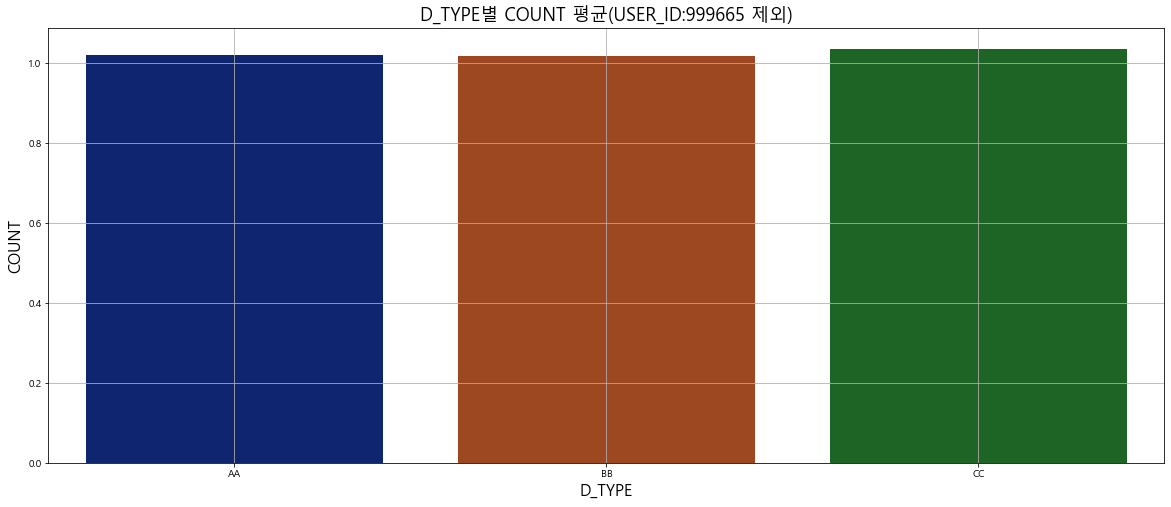

In [132]:
# USER_ID = 999665 제외 data 만들기
df_1 = df_train[df_train['USER_ID']!=999665]

# D_TYPE별 COUNT 평균(USER_ID:999665 제외) 그래프 그리기
dtype_count = df_1['COUNT'].groupby(df_1['D_TYPE']).mean()
plt.figure(figsize=(20,8))
sns.barplot(dtype_count.index, dtype_count.values, palette='dark')
plt.grid()
plt.title('D_TYPE별 COUNT 평균(USER_ID:999665 제외)', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('D_TYPE', fontsize=16)
plt.show()

차이가 없는 것을 알 수 있다. 앞에서 큰 차이를 보였던 것은 USER_ID=999665 때문이었음을 알 수 있음. 

In [157]:
df_1[df_1['D_TYPE']=='AA'].head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
6,61985,2015-02-26,AA,109037,A,2020-01-01,1,J
8,71927,2015-03-31,AA,182320,A,2020-01-01,1,JRR
10,74429,2015-04-09,AA,82399,A,2020-01-01,1,JRR


## EDA 요약
- 특정 ID (USER_ID = 999665) 때문에 D_TYPE별 평균 COUNT값의 차이가 났고, 이를 제외하고 살펴보니 값의 차이가 나지 않았다. 
- D_TYPE, GOODS_TYPE 모두 COUNT값에 영향을 미치지 않는 것으로 생각됨. 

# 분석 

## JOIN_DATE와 관련한 분석 

- 모델에 대한 기본 변수 : D_TYPE, GOODS_TYPE, AD1
- 추가적으로 'JOIN_DATE' 변수를 통한 분석을 시행한다.
    - 해볼 수 있는 분석 : 1. 가입한 일수별, 가입한 주차별, 가입 달별 

분석 방법
1. train data 5-fold cross varidation
2. 기본 변수만을 가진 모델 만들기
3. 'JOIN_DATE'변수에 대한 추가적인 변수 생성
4. 추가 생성 변수를 추가하여 모델 성능확인

### 데이터 셋 만들기

In [9]:
# train data 필요 없는 변수 삭제 
df_train1 = df_train.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE'],axis=1)
df_train1.head()

,D_TYPE,GOODS_TYPE,COUNT,AD1
0,AA,A,1,GN
1,BB,A,1,J
2,BB,A,1,SC
3,BB,C,1,MP
4,AA,C,1,JRR


In [10]:
# test data 필요없는 변수 삭제
df_test1 = df_test.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE'],axis=1)
df_test1.head()

,D_TYPE,GOODS_TYPE,COUNT,AD1
623579,AA,A,1,JRR
623580,BB,D,1,J
623581,BB,A,1,JRR
623582,BB,A,1,DJ
623583,AA,A,1,SD


### 기본 변수 3개 레이블 인코딩

In [11]:
# Feature Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_train1['D_TYPE'] = le.fit_transform(df_train1['D_TYPE'])
df_train1['GOODS_TYPE'] = le.fit_transform(df_train1['GOODS_TYPE'])
df_train1['AD1'] = le.fit_transform(df_train1['AD1'])

print(df_train1['D_TYPE'].unique())
print(df_train1['GOODS_TYPE'].unique())
print(df_train1['AD1'].unique())

[0 1 2]
[0 2 1 3]
[37 46 60 49 48 74 35 75 40 28  3 20  0 13 50 17 73 61 29 41 21 57 27 39
 34 59 44 52 42 47 30 33 36 11 63  6  4 26 43 12 53 31 45 18 32 25 71 19
  2 15 38 66  1 22 70  5 77 24 54  7 76 58 55 23 65  8 72  9 67 14 64 62
 56 10 16 68 69 51]


### train data 5-fold cross varidation

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

num_split = 5
kf = KFold(n_splits=num_split)

### 모형 예측

In [211]:
x1 = df_train1.drop('COUNT',axis=1)
y1 = df_train1[['COUNT']]

In [189]:
from sklearn.ensemble import RandomForestRegressor


avg_MSE = 0.0
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    
    rfr.fit(x_train, y_train)
    
    y_pred = rfr.predict(x_test)
    
    avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)
    
print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 0.1520785553635671
Avergae RMSE : 0.38997250590723326


### 'JOIN_DATE'에 대한 추가 변수 생성

#### 2.1.5.1 가입일수(DATE-JOIN_DATE)

In [13]:
# 가입일수(DATE-JOIN_DATE) 변수 생성
df_train['가입일수'] = df_train['DATE']-df_train['JOIN_DATE']
df_train.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,가입일수
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2185 days
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2147 days
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,1868 days
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,1854 days
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,1851 days


In [14]:
# 가입일수 변수 int변환
df_train['가입일수'] = df_train['가입일수'].dt.days.astype(int)
df_train.dtypes

USER_ID                int64
JOIN_DATE     datetime64[ns]
D_TYPE                object
STORE_ID               int64
GOODS_TYPE            object
DATE          datetime64[ns]
COUNT                  int64
AD1                   object
가입일수                   int32
dtype: object

In [15]:
# 가입일수 변수 살펴보기
df_train['가입일수'].describe()

count    623579.000000
mean        454.990486
std         831.179855
min           0.000000
25%          74.000000
50%         287.000000
75%         672.000000
max       18535.000000
Name: 가입일수, dtype: float64

In [16]:
df_train.sort_values(by=['가입일수'],ascending=False).head(100)

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,가입일수
622832,1251357,1970-01-01,CC,158176,A,2020-09-30,1,SC,18535
620476,1251357,1970-01-01,CC,105033,B,2020-09-29,1,SC,18534
621660,1641479,1970-01-01,CC,82407,A,2020-09-29,1,GN,18534
622272,1708743,1970-01-01,CC,90542,B,2020-09-29,1,GN,18534
615070,1251357,1970-01-01,CC,158176,A,2020-09-27,1,SC,18532
...,...,...,...,...,...,...,...,...,...
510540,1229436,1970-01-01,CC,28018,C,2020-08-17,1,JRR,18491
510564,1245765,1970-01-01,CC,109265,A,2020-08-17,1,CY,18491
509554,1658164,1970-01-01,CC,90193,C,2020-08-16,1,GW,18490
507101,1612762,1970-01-01,CC,104075,A,2020-08-15,1,MP,18489


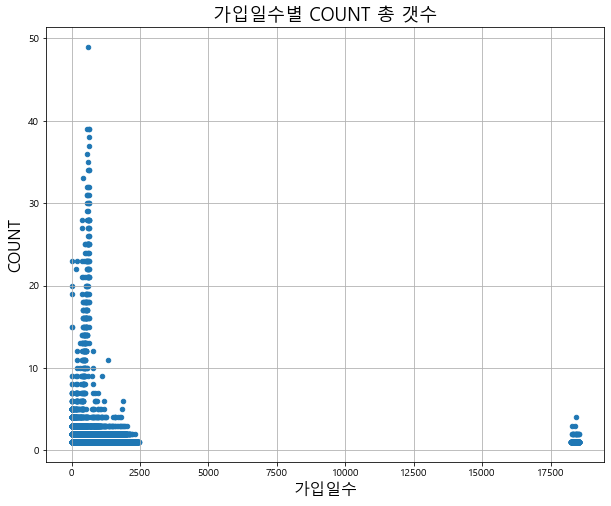

In [249]:
df_train.plot(kind='scatter', x='가입일수', y='COUNT', figsize=(10,8))
plt.grid()
plt.title('가입일수별 COUNT 총 갯수', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('가입일수', fontsize=16)
plt.show()

In [282]:
df_train['JOIN_DATE'].value_counts().sort_index()

1970-01-01     972
2013-12-16       1
2013-12-17      20
2013-12-18       1
2013-12-21       2
2013-12-23       3
2014-01-02      13
2014-01-07       2
2014-01-08       4
2014-01-15      15
2014-01-17      32
2014-01-31      23
2014-02-03       2
2014-02-04       6
2014-02-05       4
2014-02-07       9
2014-02-14       2
2014-02-17       3
2014-03-05      15
2014-03-06       1
2014-03-08       1
2014-03-09       5
2014-03-13       1
2014-03-14       4
2014-03-17      57
2014-03-27       1
2014-03-28       7
2014-04-22       4
2014-05-17      41
2014-05-20       5
2014-06-11       1
2014-06-12       5
2014-07-04       6
2014-07-15       1
2014-07-16       1
2014-07-19      37
2014-07-27       2
2014-07-29      26
2014-08-01       3
2014-08-11       1
2014-08-13       1
2014-08-27       3
2014-08-28       1
2014-09-02       9
2014-09-03      20
2014-09-04       7
2014-09-05      16
2014-09-06      14
2014-09-09       6
2014-09-10       9
2014-09-11       9
2014-09-12      36
2014-09-13  

회사 설립일 : 2013년 2월 4일<br>
JOIN_DATE = 1970/01/01 이상치 변환 필요

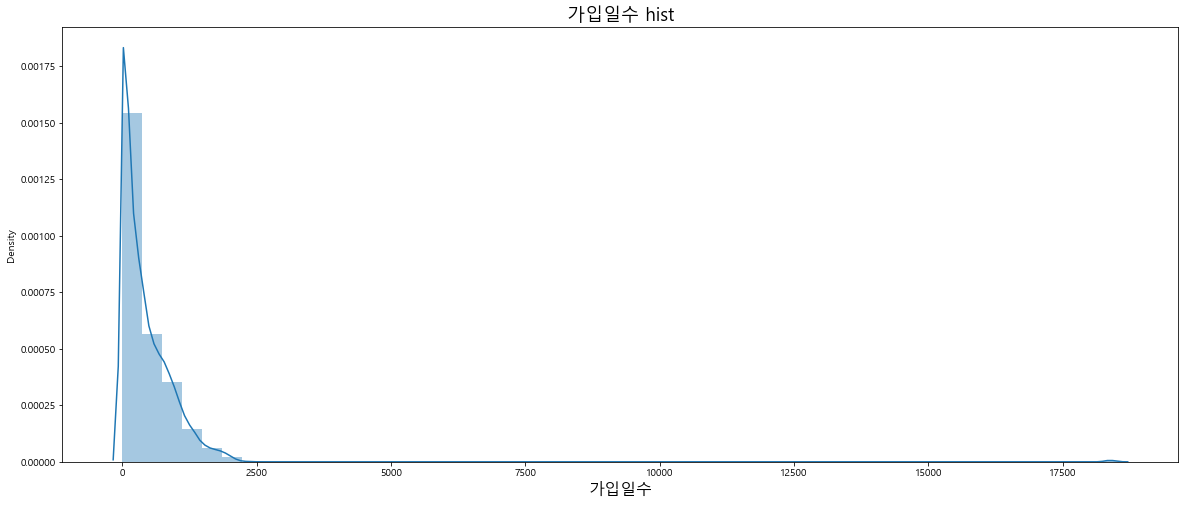

In [286]:
plt.figure(figsize=(20,8))
sns.distplot(df_train['가입일수'])
plt.title('가입일수 hist', fontsize=18)
plt.xlabel('가입일수', fontsize=16)
plt.show()

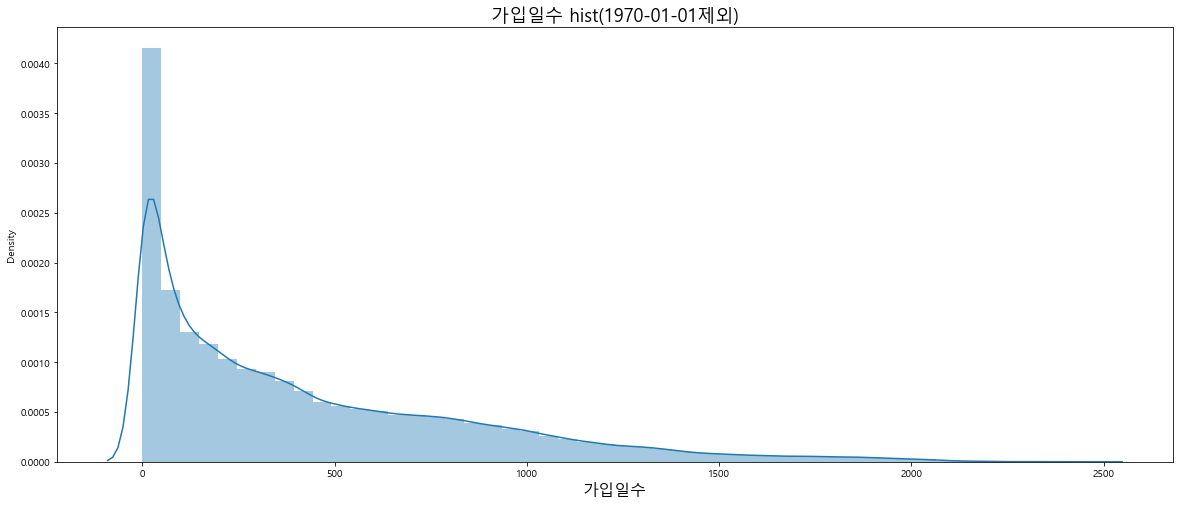

In [290]:
# 1970-01-01제외 가입일수 histogram
plt.figure(figsize=(20,8))
sns.distplot(df_train[df_train['JOIN_DATE']>'1970-01-01']['가입일수'])
plt.title('가입일수 hist(1970-01-01제외)', fontsize=18)
plt.xlabel('가입일수', fontsize=16)
plt.show()

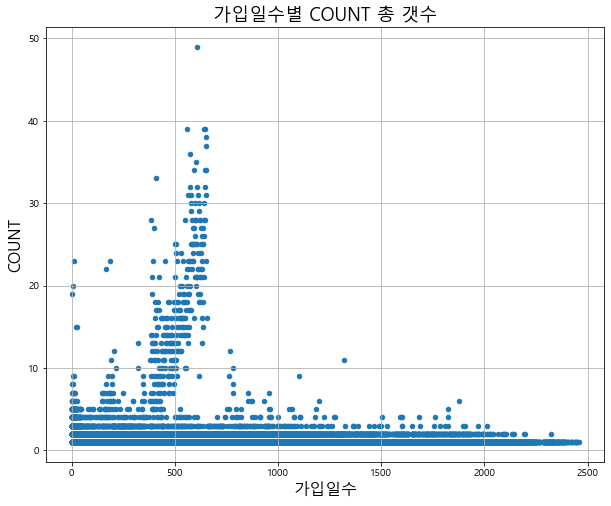

In [291]:
df_train[df_train['JOIN_DATE']>'1970-01-01'].plot(kind='scatter', x='가입일수', y='COUNT', figsize=(10,8))
plt.grid()
plt.title('가입일수별 COUNT 총 갯수', fontsize=18)
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('가입일수', fontsize=16)
plt.show()

count가 낮은 것을 제외하면 가입일수가 높을수록 상승하는 경향 존재.

In [292]:
# Feature Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_train['D_TYPE'] = le.fit_transform(df_train['D_TYPE'])
df_train['GOODS_TYPE'] = le.fit_transform(df_train['GOODS_TYPE'])
df_train['AD1'] = le.fit_transform(df_train['AD1'])

print(df_train['D_TYPE'].unique())
print(df_train['GOODS_TYPE'].unique())
print(df_train['AD1'].unique())

[0 1 2]
[0 2 1 3]
[37 46 60 49 48 74 35 75 40 28  3 20  0 13 50 17 73 61 29 41 21 57 27 39
 34 59 44 52 42 47 30 33 36 11 63  6  4 26 43 12 53 31 45 18 32 25 71 19
  2 15 38 66  1 22 70  5 77 24 54  7 76 58 55 23 65  8 72  9 67 14 64 62
 56 10 16 68 69 51]


In [295]:
# 데이터 생성
x = df_train.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','COUNT'],axis=1)
y = df_train[['COUNT']]

In [297]:
# 모형 예측해보기
x = df_train.drop('USER_ID','STO''COUNT',axis=1)
y = df_train[['COUNT']]

from sklearn.ensemble import RandomForestRegressor


avg_MSE = 0.0
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    
    rfr.fit(x_train, y_train)
    
    y_pred = rfr.predict(x_test)
    
    avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)
    
print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 0.09921464702860736
Avergae RMSE : 0.3149835662833973


1970-01-01 데이터를 제외하거나, 바꾸지 않고, <br>
가입일수(=DATE-JOIN_DATE)변수를 만들어서 모형에 추가하여 돌려보니 <br>
Average MSE : 0.09921464702860736 <br>
Avergae RMSE : 0.3149835662833973 <br>

JOIN_DATE = 1970-01-01 데이터 더 살펴보기

In [304]:
df_1970 = df_train[df_train['JOIN_DATE']=='1970-01-01']
len(df_1970)

972

In [314]:
df_1970.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,가입일수
437,1081430,1970-01-01,2,90070,0,2020-01-01,1,29,18262
2196,1410151,1970-01-01,2,92437,1,2020-01-02,1,46,18263
2204,1415023,1970-01-01,2,131081,0,2020-01-02,1,75,18263
2434,125582,1970-01-01,2,91885,0,2020-01-03,1,74,18264
2645,602188,1970-01-01,2,2334,1,2020-01-03,1,49,18264


In [310]:
df_1970.describe()
# D_TYPE이 무조건 2(=CC)값을 가진다. 

,USER_ID,D_TYPE,STORE_ID,GOODS_TYPE,COUNT,AD1,가입일수
count,9.720000e+02,972.0,972.000000,972.000000,972.000000,972.000000,972.000000
mean,1.233269e+06,2.0,151952.923868,0.507202,1.024691,37.963992,18386.616255
std,4.077076e+05,0.0,62550.156447,0.826286,0.185486,19.838995,73.223807
min,2.829200e+04,2.0,635.000000,0.000000,1.000000,0.000000,18262.000000
25%,1.163314e+06,2.0,101986.750000,0.000000,1.000000,20.000000,18319.750000
50%,1.363699e+06,2.0,173268.000000,0.000000,1.000000,46.000000,18386.000000
75%,1.519932e+06,2.0,220700.000000,1.000000,1.000000,49.000000,18447.000000
max,1.708743e+06,2.0,223664.000000,3.000000,4.000000,76.000000,18535.000000


In [315]:
df_1970['COUNT'].value_counts()

1    952
2     17
3      2
4      1
Name: COUNT, dtype: int64

In [317]:
df_train[df_train['USER_ID']==1277650]

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,가입일수
188550,1277650,1970-01-01,2,182864,0,2020-04-09,1,71,18361
368711,1277650,1970-01-01,2,92264,2,2020-06-26,4,48,18439


#### 1970-01-01데이터를 제외하고 모델링

In [323]:
df_train2 = df_train[df_train['JOIN_DATE'] != '1970-01-01']

In [324]:
# Feature Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_train2['D_TYPE'] = le.fit_transform(df_train2['D_TYPE'])
df_train2['GOODS_TYPE'] = le.fit_transform(df_train2['GOODS_TYPE'])
df_train2['AD1'] = le.fit_transform(df_train2['AD1'])

print(df_train2['D_TYPE'].unique())
print(df_train2['GOODS_TYPE'].unique())
print(df_train2['AD1'].unique())

[0 1 2]
[0 2 1 3]
[37 46 60 49 48 74 35 75 40 28  3 20  0 13 50 17 73 61 29 41 21 57 27 39
 34 59 44 52 42 47 30 33 36 11 63  6  4 26 43 12 53 31 45 18 32 25 71 19
  2 15 38 66  1 22 70  5 77 24 54  7 76 58 55 23 65  8 72  9 67 14 64 62
 56 10 16 68 69 51]


In [325]:
# 데이터 생성
x = df_train2.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','COUNT'],axis=1)
y = df_train2[['COUNT']]

In [326]:
# 모형 돌려보기
from sklearn.ensemble import RandomForestRegressor


avg_MSE = 0.0
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    
    rfr.fit(x_train, y_train)
    
    y_pred = rfr.predict(x_test)
    
    avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)
    
print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 0.10147123878334478
Avergae RMSE : 0.3185455050433843


#### 1970-01-01값을 2013-12-16(최소값)으로 바꾸기 
+) 월/일 데이터 추가

In [17]:
df_train.loc[(df_train['JOIN_DATE']=='1970-01-01'),'JOIN_DATE']='2013-12-16'
df_train['JOIN_DATE'] = pd.to_datetime(df_train['JOIN_DATE'])
df_train['가입일수'] = df_train['DATE']-df_train['JOIN_DATE']
df_train['가입일수'] = df_train['가입일수'].dt.days.astype(int)
df_train['월']= df_train['DATE'].dt.month
df_train['일']=df_train['DATE'].dt.day

In [18]:
df_train.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,가입일수,월,일
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2185,1,1
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2147,1,1
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,1868,1,1
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,1854,1,1
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,1851,1,1


In [19]:
df_train.describe()

,USER_ID,STORE_ID,COUNT,가입일수,월,일
count,6.235790e+05,623579.000000,623579.000000,623579.000000,623579.000000,623579.000000
mean,1.160892e+06,148121.476666,1.027009,429.964851,5.364153,16.040125
std,4.058201e+05,68859.988608,0.426268,441.042872,2.518734,8.720444
min,2.240000e+02,4.000000,1.000000,0.000000,1.000000,1.000000
25%,8.610140e+05,92403.000000,1.000000,74.000000,3.000000,9.000000
50%,1.266192e+06,158176.000000,1.000000,287.000000,6.000000,16.000000
75%,1.509012e+06,220655.000000,1.000000,672.000000,8.000000,24.000000
max,1.709952e+06,230873.000000,49.000000,2480.000000,9.000000,31.000000


In [20]:
df_train.dtypes

USER_ID                int64
JOIN_DATE     datetime64[ns]
D_TYPE                object
STORE_ID               int64
GOODS_TYPE            object
DATE          datetime64[ns]
COUNT                  int64
AD1                   object
가입일수                   int32
월                      int64
일                      int64
dtype: object

In [21]:
# Feature Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_train['D_TYPE'] = le.fit_transform(df_train['D_TYPE'])
df_train['GOODS_TYPE'] = le.fit_transform(df_train['GOODS_TYPE'])
df_train['AD1'] = le.fit_transform(df_train['AD1'])

print(df_train['D_TYPE'].unique())
print(df_train['GOODS_TYPE'].unique())
print(df_train['AD1'].unique())


[0 1 2]
[0 2 1 3]
[37 46 60 49 48 74 35 75 40 28  3 20  0 13 50 17 73 61 29 41 21 57 27 39
 34 59 44 52 42 47 30 33 36 11 63  6  4 26 43 12 53 31 45 18 32 25 71 19
  2 15 38 66  1 22 70  5 77 24 54  7 76 58 55 23 65  8 72  9 67 14 64 62
 56 10 16 68 69 51]


In [22]:
# 데이터 생성
x = df_train.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','COUNT'],axis=1)
y = df_train[['COUNT']]

In [58]:
# 모형 예측해보기
from sklearn.ensemble import RandomForestRegressor


avg_MSE = 0.0
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    
    rfr.fit(x_train, y_train)
    
    y_pred = rfr.predict(x_test)
    
    avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)
    
print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 0.01216980949514318
Avergae RMSE : 0.11031685952357047


In [1]:
pd.DataFrame(y_pred).value_counts().sort_index(ascending=False)

NameError: name 'pd' is not defined

#### count값에 log 취해서 계산  

In [44]:
df_train['log_COUNT']=np.log(df_train['COUNT'])

array([[<AxesSubplot:title={'center':'USER_ID'}>,
        <AxesSubplot:title={'center':'D_TYPE'}>,
        <AxesSubplot:title={'center':'STORE_ID'}>],
       [<AxesSubplot:title={'center':'GOODS_TYPE'}>,
        <AxesSubplot:title={'center':'COUNT'}>,
        <AxesSubplot:title={'center':'AD1'}>],
       [<AxesSubplot:title={'center':'가입일수'}>,
        <AxesSubplot:title={'center':'월'}>,
        <AxesSubplot:title={'center':'일'}>],
       [<AxesSubplot:title={'center':'log_COUNT'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

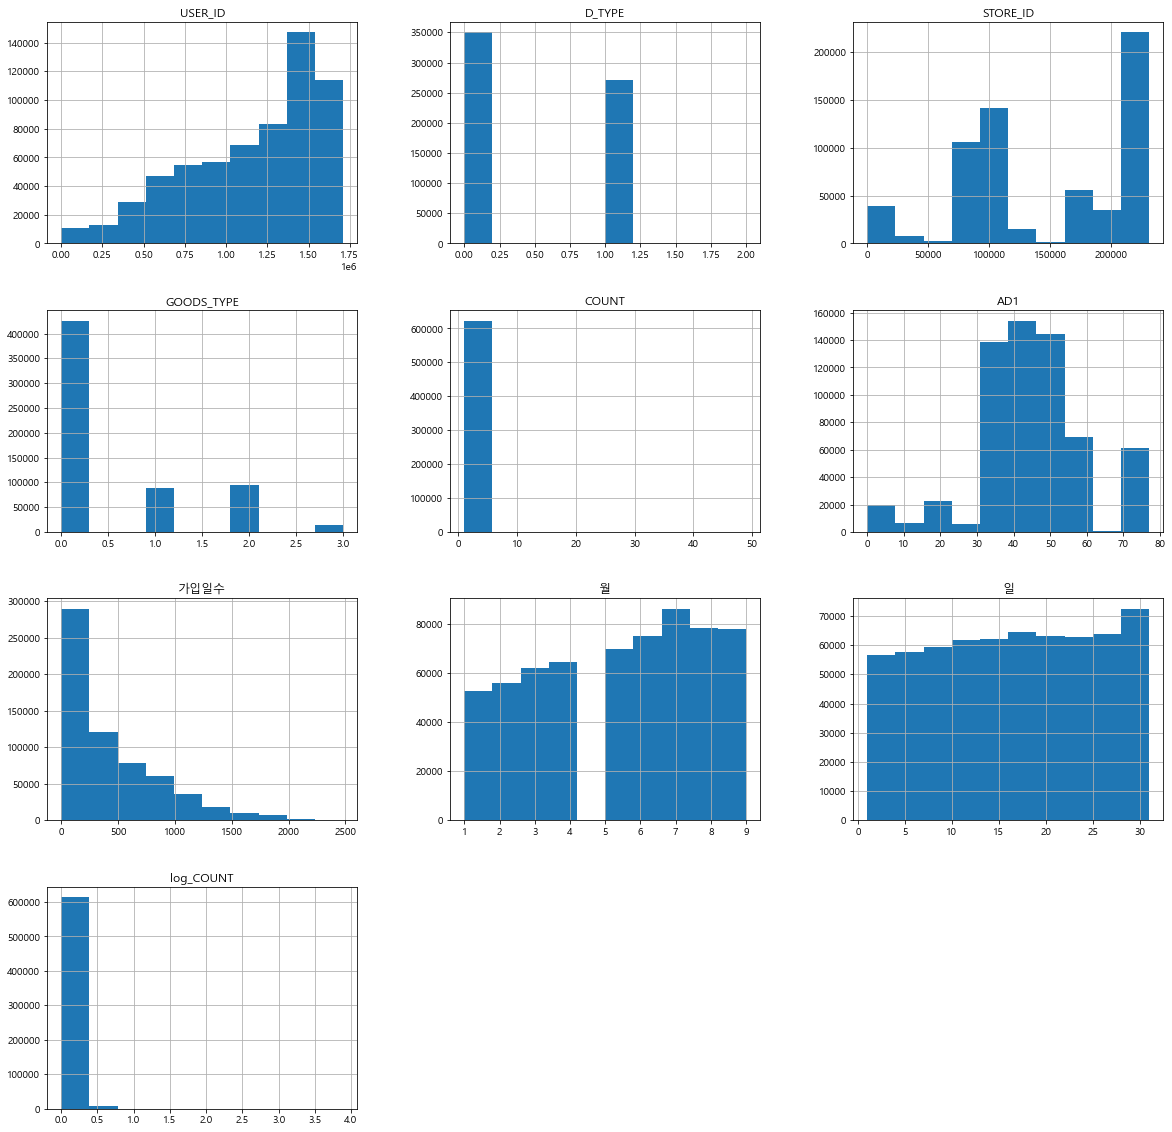

In [61]:
df_train.hist(figsize=(20,20))

In [51]:
# 데이터 생성
x = df_train.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','COUNT','log_COUNT'],axis=1)
y = df_train[['log_COUNT']]

In [52]:
# 모형 예측해보기
from sklearn.ensemble import RandomForestRegressor


avg_MSE = 0.0
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    
    rfr.fit(x_train, y_train)
    
    y_pred = rfr.predict(x_test)
    
    avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)
    
print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 0.012190917532195734
Avergae RMSE : 0.11041248811704106


In [57]:
pd.DataFrame(y_pred).value_counts().sort_index(ascending=False)

3.369914        1
3.357300        1
3.330751        1
3.315060        1
3.314243        1
            ...  
0.000845        2
0.000770        1
0.000630        2
0.000578        1
0.000000    57730
Length: 3272, dtype: int64